In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#categorical and continious variables
cat = Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
cont = ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [12]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


Applicants with credit history of 1 are more eligible for loan.

In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There exists class imbalance.

In [14]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df=df.replace(to_replace='3+', value=4)

As feeding 3+ to the model is not fessible, so replaced it with 4

In [16]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

More number of males have applied for loan than females

In [17]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

More number of married people have applied for loan than females

In [18]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

More number of Graduate people have applied for loan.

In [19]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

More number of people Semiurban and Urban area have applied for loan.

In [20]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Maximum number of self employed people have applied for loan.

In [21]:
df['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

Maximum number of people with Credit_History 1 have applied for loan.

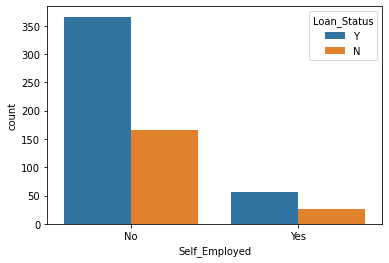

In [22]:
sns.countplot(df['Self_Employed'], hue='Loan_Status', data=df);

0-Not self employed
1-Self employed

1-Loan approved
0-Loan not approved

Maximum people who are Not self employed have applied for loan and loan approval is almost equal for both the cases.

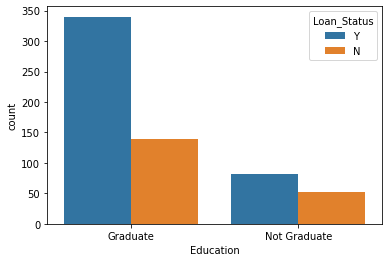

In [23]:
sns.countplot(df['Education'], hue='Loan_Status', data=df);

In most of the cases if the person is educated the loan is being approved.

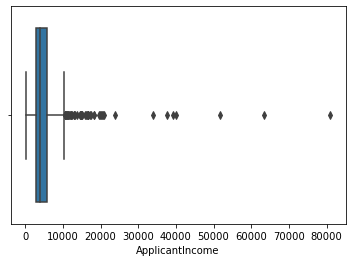

In [24]:
sns.boxplot(x=df['ApplicantIncome']);

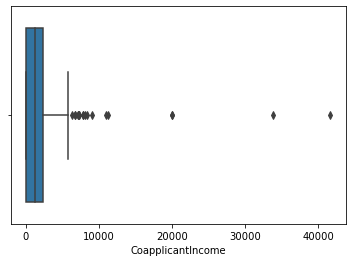

In [25]:
sns.boxplot(x=df['CoapplicantIncome']);

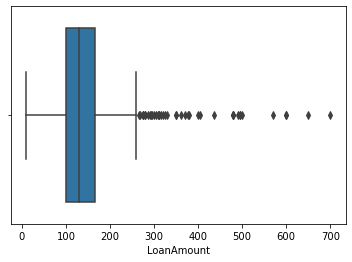

In [26]:
sns.boxplot(x=df['LoanAmount']);

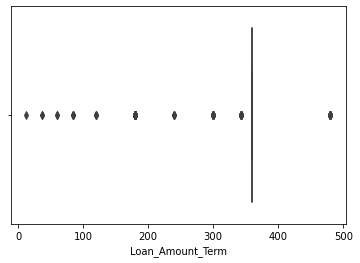

In [27]:
sns.boxplot(x=df['Loan_Amount_Term']);

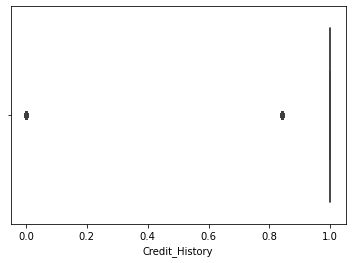

In [28]:
sns.boxplot(x=df['Credit_History']);

<AxesSubplot:>

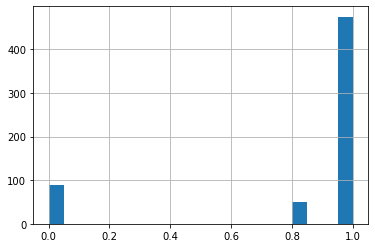

In [29]:
df['Credit_History'].hist(bins=20)

In [30]:
from scipy.stats import zscore
z_score = zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
df = df[filtering_entry]
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,577.000000,577.000000,577.000000,577.000000,577.000000
mean,4666.020797,1420.807487,136.048644,347.604853,0.838646
std,2965.452652,1651.545352,56.193532,51.819095,0.353795
min,150.000000,0.000000,9.000000,180.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3750.000000,1255.000000,128.000000,360.000000,1.000000
75%,5532.000000,2253.000000,160.000000,360.000000,1.000000
max,20667.000000,8980.000000,380.000000,480.000000,1.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

In [33]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [36]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

ApplicantIncome- non categorical
CoapplicantIncome- non categorical
Loan_Amount_Term- non categorical
Credit_History- non categorical
Loan_Status-Target column

Rest features are continious feature, so skewness need not be treated.

In [37]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

In [38]:
df['ApplicantIncome'], param = stats.boxcox(df.ApplicantIncome+1)
df['CoapplicantIncome'], param = stats.boxcox(df.CoapplicantIncome+1)
df['LoanAmount'], param = stats.boxcox(df.LoanAmount+1)
df['Loan_Amount_Term'], param = stats.boxcox(df.Loan_Amount_Term+1)
df['Credit_History'], param = stats.boxcox(df.Credit_History+1)

In [39]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027980
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

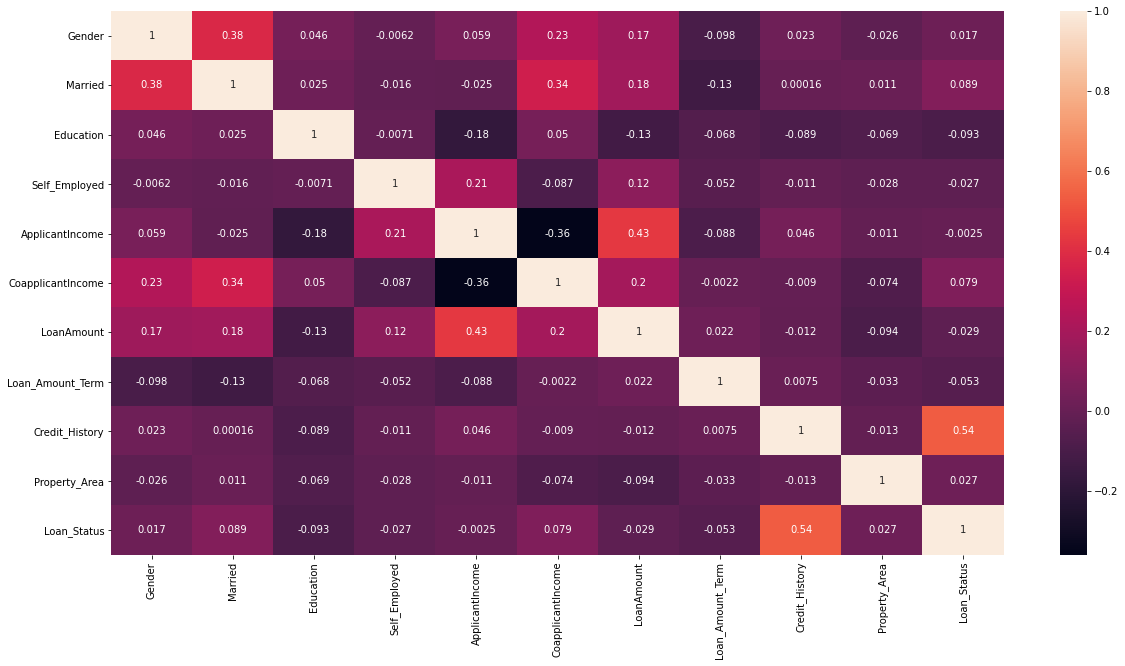

In [40]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [41]:
corr_matrix = df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.537357
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Gender               0.017408
ApplicantIncome     -0.002484
Self_Employed       -0.026525
LoanAmount          -0.028999
Loan_Amount_Term    -0.053447
Education           -0.092658
Name: Loan_Status, dtype: float64

None of the columns have very good correlation with our target column.

In [45]:
y = df['Loan_Status']
X = df.drop(columns = ['Loan_Status'])

In [46]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [47]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Class imbalance is treated.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.7989949748743719 on Random_state 10


In [51]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

In [52]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7989949748743719
[[68 22]
 [18 91]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        90
           1       0.81      0.83      0.82       109

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199



In [68]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6934673366834171
[[64 26]
 [35 74]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        90
           1       0.74      0.68      0.71       109

    accuracy                           0.69       199
   macro avg       0.69      0.70      0.69       199
weighted avg       0.70      0.69      0.69       199



In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.8291457286432161
[[75 15]
 [19 90]]


In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8291457286432161
[[75 15]
 [19 90]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        90
           1       0.86      0.83      0.84       109

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



In [56]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.5


In [57]:
rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

Cross validation score of DecisionTree model : 0.5


In [58]:
rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

Cross validation score of RandomForest model : 0.8292138364779875


In [59]:
rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of SVC model : 0.5


Though RandomForest model is proved to be the best model, checking ROC score to select the best model.

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [61]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


In [62]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)

print("All models test scores captured")

All models test scores captured


In [63]:
roc_auc_score(y_test,LR.predict(x_test))

0.7952089704383282

In [64]:
roc_auc_score(y_test,DT.predict(x_test))

0.7952089704383282

In [65]:
roc_auc_score(y_test,rf.predict(x_test))

0.837716615698267

In [66]:
roc_auc_score(y_test,svc.predict(x_test))

0.8154943934760449

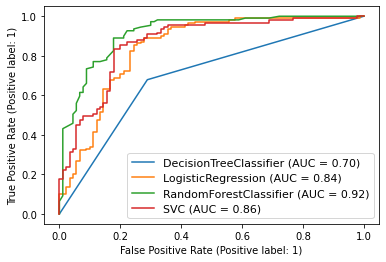

In [69]:
disp=plot_roc_curve(DT,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

RandomForest model is my best model.

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [73]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 800}

In [74]:
model=RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 'log2',
 n_estimators= 800)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.41206030150754


In [75]:
import pickle
filename = 'Loan prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))